Reese Final Project

# Introduction

Lake Ontario acts as the outlet for all water from the Great Lakes. The St Lawrence River is the sole outlet for the lake, and has its flow regulated by the Moses Saunders Dam. This effectively controls the water level height of the lake. Throughout history, water height levels in the lake have fluctuated with some years reaching coastal flood levels. Those years were: 1973, 1976, 1983, 1998, 2017, 2019. The regulation of the outflow from the lake is managed through an internation organization between Canada and the United States known as the Internation Joint Commission  (IJC). Representation on the board of the commission is shared equally between both countries.

There have been two major regulation plans for discharge out of the St. Lawrence river, Plan 1958D and Plan 2014. Plan 1958D had been in effect from 1960 to 2016, and Plan 2014 has been in effect since 2016. After the transition of control plans, Lake Ontario experienced two of its worst flood years in history in 2017 and 2019. This led to anecdotal evidence of the change in control plans being the cause of the flooding instead of unusually wet conditions throughout the year. 

This study seeks to understand and quantify the changes the control plans had during years of excessive lake height. By analyzing a variety of data from the US side of Lake Ontario, as well as the discharge logs from the Moses Saunders Dam maintained by the IJC, a determination will be made on the various factors influencing flood levels in the lake by creating a rudimentary water budget for Lake Ontario. The overall goal of this study is to prove or disprove the anectdotal evidence that Plan 2014 has caused the intense flooding along the lake's coastline due to the change in operating procedures.

# Site Description

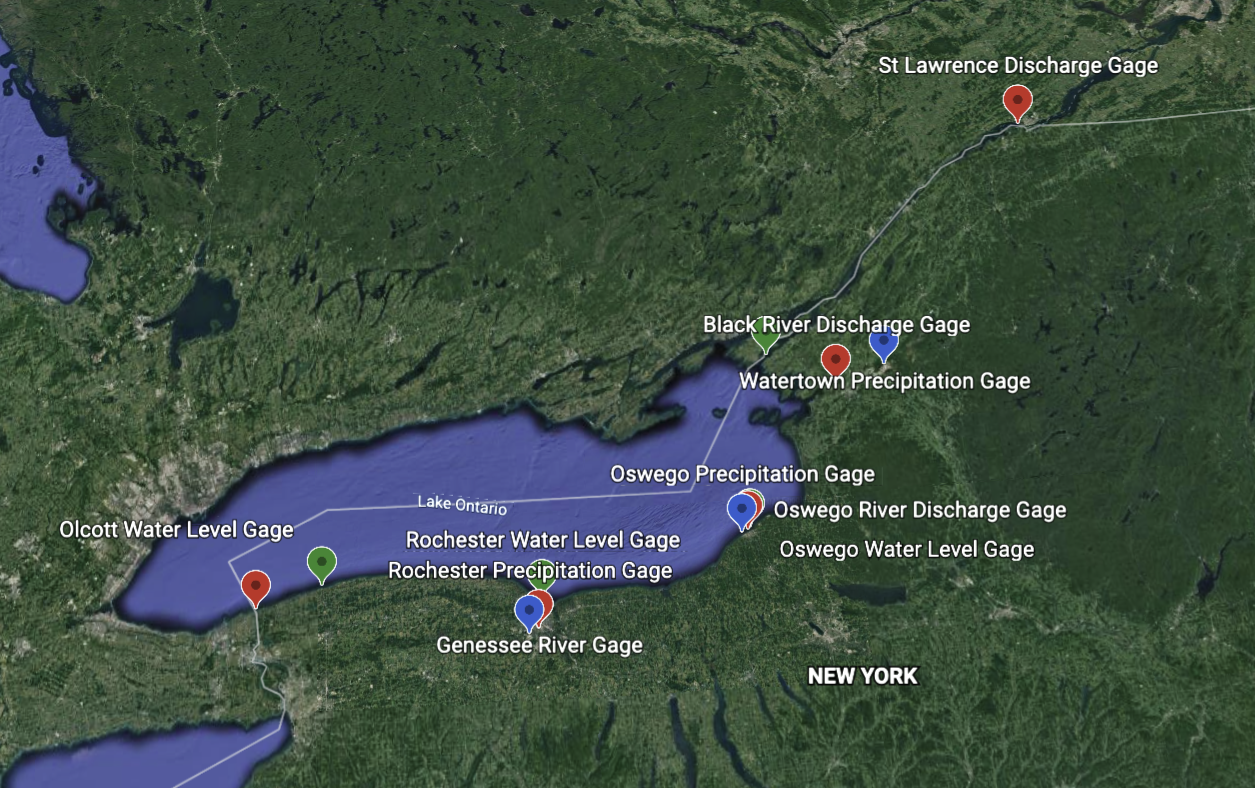
**Figure 1.** A map showing Lake Ontario, as well as the location of various collected data. Discharge data are marked by red symbols, water level data are marked by green symbols, and precipitation data are marked by blue symbols.



The main site this study will seek to address is Lake Ontario and the shorefront communities, this 
will be done by incorporating data from 7 general locations along the American side of the lake. 
These  sites  are  all  located  in  New  York,  and  are  based  out  of  Niagara  Falls,  Olcott,  Rochester, 
Oswego, Watertown, Cape Vincent, and Massena. These sites were selected due to the 
availability  of  data  from  various  governmental  agencies,  as  well  as  providing  a  representative 
sample  distributed  across  the  southern  and  western  coasts  of  Lake  Ontario.  The  communities 
affected by the flooding mentioned in this study lie between gaging locations. The data available 
for these sites are daily values for precipitation, discharge, and water level height. The 
approximate location of the gages is shown in Figure 1, with blue symbols for precipitation gages, 
red  symbols  for  discharge  gages,  green  symbols  for  water  height  gages.  All  data  collected  was 
available  from  1968  to  2021,  which  encompasses  6  of  the  7  major  peak  floods  on  record.  The 
drainage basin for the St. Lawrence River gage station is 298,800 mi2, encompassing all the Great 
Lakes as well as lesser lakes and tributaries draining directly into the St. Lawrence. The basin of 
Niagara River site represents 263,700 mi2 of the total for the St. Lawrence River basin, while the 
Oswego River (5,100 mi2), Genesee River (2,474 mi2), and the Black River (1,864 mi2) contribute 
approximately 9,500 mi2 to the total basin area.


| Data Type | Location | Gage Number |
| :-: | :-: | :-: |
|Water Height| Olcott, NY| 9052076|
|Water Height| Rochester, NY| 9052058|
|Water Height| Oswego, NY| 9052030|
|Water Height| Cape Vincent, NY| 9052000|
|Discharge| Niagara River, NY| 04216000|
|Discharge| Genessee River, NY| 04231600|
|Discharge| Oswego River, NY| 04249000|
|Discharge| Black River, NY| 04260500|
|Discharge| St. Lawrence River, NY| 04264331|
|Precipitation| Rochester, NY| USW00014768|
|Precipitation| Oswego, NY| USC00306314|
|Precipitation| Watertown, NY| USW00094790|

**Table 1.** A table showing the data type, location, and gage number for all data sets used for the study. Water 
height data were collected from the NOAA Tides and Currents database, discharge data was collected from the 
USGS gaging station database, and precipitation data was gathered from the NOAA Climate Data Online database.


# Methods

In [1]:
#%%
#External libraries
# This cell imports libraries that this code uses

import numpy as np                   # functions for data analysis 
import pandas as pd                  # functions for data frames
from matplotlib import pyplot as plt
import datetime 


In [2]:
#%% Constants

startdate = datetime.datetime(1969, 1, 1)
enddate = datetime.datetime(2020, 12, 31)

headerlist = ['Date Time', 'Water Level', 'I', 'L']

#Drainage areas
niagmi = 263700
niagft = niagmi * 27878000

gennmi = 2474
gennft = gennmi * 27878000

ozmi = 5100
ozft = ozmi * 27878000

blkmi = 1864
blkft = blkmi * 27878000

stlmi = 298800 #sqmi
stlft = stlmi * 27878000

lakeontmi = 7320
lakeontft = lakeontmi * 27878000

avgwithdrawals = (9000 * 1e6) * 0.133681 #cubic feet
avgdailywithdrawaldepth = avgwithdrawals / lakeontft #https://www.glc.org/about/ annual report of great lakes regional water use database


#Estimated annual evaporation
evap = 2.62467 #ft https://www-sciencedirect-com.unh.idm.oclc.org/science/article/pii/S0380133076722810
dailyevap = evap/365

In [3]:
#%% Ingesting, organizing, and filling missing water level data

waterlevelfiles =  ['olc68to77.csv', 'olc78to87.csv', 'olc88to97.csv', 'olc98to07.csv',
               'olc08to17.csv', 'olc18to20.csv', 'Cape68to77.csv', 'Cape78to87.csv',
               'Cape88to97.csv', 'Cape98to07.csv', 'Cape08to17.csv', 'Cape18to20.csv',
               'Oz68to77.csv', 'Oz78to87.csv', 'Oz88to97.csv', 'Oz98to07.csv', 
               'Oz08to17.csv', 'Oz18to20.csv', 'Roch68to77.csv', 'Roch78to87.csv', 
               'Roch88to97.csv', 'Roch98to07.csv', 'Roch08to17.csv', 'Roch18to20.csv', 
               ]

dscgfiles = ['niagdscg.csv', 'lawdscg.csv', 'genndscg.csv', 'blkdscg.csv', 'ozdscg.csv']

prcpfile = ['ozprcp.csv', 'rochprcp.csv', 'wtprcp.csv']

For this study, data was gathered from a variety of databases and brought together to create a water budget for Lake Ontario. Water level height data in the lake was gathered from the Tides and Currents database within the National Oceanographic and Atmospheric Administration for four sites along the New York side of the lake: Olcott, Rochester, Oswego, and Cape Vincent. Rudimentary evaporation data was found from a previous publish article by Witherspoon (1978), and calculated water withdrawal values were gathered from the Great Lakes Commission. These sites represent the southern and eastern shores of Lake Ontario. Data were then analyzed for variation among sites to determine if it was suitable to use the average of all sites as an analogue for analysis.

In [4]:
#%% Importing Water Level Data

olcdflvl0 = pd.read_csv(waterlevelfiles[0], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
olcdflvl0.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

olcdflvl1 = pd.read_csv(waterlevelfiles[1], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
olcdflvl1.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

olcdflvl2 = pd.read_csv(waterlevelfiles[2], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
olcdflvl2.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

olcdflvl3 = pd.read_csv(waterlevelfiles[3], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
olcdflvl3.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

olcdflvl4 = pd.read_csv(waterlevelfiles[4], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
olcdflvl4.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

olcdflvl5 = pd.read_csv(waterlevelfiles[5], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
olcdflvl5.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

#Joining into one site dataframe, trimming to the date, renaming columns
olcdflvl = pd.concat([olcdflvl0, olcdflvl1, olcdflvl2, olcdflvl3, olcdflvl4, 
                      olcdflvl5], axis=0, join='outer', ignore_index=False)
olcdflvl = olcdflvl[startdate:enddate]
olcdflvl.rename(columns = {'Water Level' : 'Olcott'}, inplace = True)

##############################################################################  Breaks between sites

capedflvl0 = pd.read_csv(waterlevelfiles[6], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
capedflvl0.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

capedflvl1 = pd.read_csv(waterlevelfiles[7], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
capedflvl1.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

capedflvl2 = pd.read_csv(waterlevelfiles[8], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
capedflvl2.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

capedflvl3 = pd.read_csv(waterlevelfiles[9], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
capedflvl3.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

capedflvl4 = pd.read_csv(waterlevelfiles[10], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
capedflvl4.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

capedflvl5 = pd.read_csv(waterlevelfiles[11], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
capedflvl5.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

#Joining into one site dataframe, trimming to the dates, renaming columns
capedflvl = pd.concat([capedflvl0, capedflvl1, capedflvl2, capedflvl3, capedflvl4,
                       capedflvl5], axis=0, join='outer', ignore_index=False)
capedflvl = capedflvl[startdate:enddate]
capedflvl.rename(columns = {'Water Level' : 'Cape Vincent'}, inplace = True)

##############################################################################  Breaks between sites

ozdflvl0 = pd.read_csv(waterlevelfiles[12], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
ozdflvl0.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

ozdflvl1 = pd.read_csv(waterlevelfiles[13], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
ozdflvl1.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

ozdflvl2 = pd.read_csv(waterlevelfiles[14], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
ozdflvl2.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

ozdflvl3 = pd.read_csv(waterlevelfiles[15], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
ozdflvl3.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

ozdflvl4 = pd.read_csv(waterlevelfiles[16], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
ozdflvl4.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

ozdflvl5 = pd.read_csv(waterlevelfiles[17], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
ozdflvl5.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

#Joining into one site dataframe, trimming to the dates, renaming columns
ozdflvl = pd.concat([ozdflvl0, ozdflvl1, ozdflvl2, ozdflvl3, ozdflvl4,
                       ozdflvl5], axis=0, join='outer', ignore_index=False)
ozdflvl = ozdflvl[startdate:enddate]
ozdflvl.rename(columns = {'Water Level' : 'Oswego'}, inplace = True)

##############################################################################  Breaks between sites

rochdflvl0 = pd.read_csv(waterlevelfiles[18], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
rochdflvl0.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

rochdflvl1 = pd.read_csv(waterlevelfiles[19], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
rochdflvl1.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

rochdflvl2 = pd.read_csv(waterlevelfiles[20], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
rochdflvl2.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

rochdflvl3 = pd.read_csv(waterlevelfiles[21], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
rochdflvl3.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

rochdflvl4 = pd.read_csv(waterlevelfiles[22], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
rochdflvl4.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

rochdflvl5 = pd.read_csv(waterlevelfiles[23], delimiter=',', comment='#', header=0, 
                 parse_dates=['Date Time'], index_col= 'Date Time', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
rochdflvl5.rename(columns=lambda x: x.strip(), inplace=True) #stripping spaces out of names

#Joining into one site dataframe, trimming to the dates, renaming columns
rochdflvl = pd.concat([rochdflvl0, rochdflvl1, rochdflvl2, rochdflvl3, rochdflvl4,
                       rochdflvl5], axis=0, join='outer', ignore_index=False)
rochdflvl = rochdflvl[startdate:enddate]
rochdflvl.rename(columns = {'Water Level' : 'Rochester'}, inplace = True)

#Keeping only water level columns which has been named with site names
olcdflvl = olcdflvl[['Olcott']]
capedflvl = capedflvl[['Cape Vincent']]
ozdflvl = ozdflvl[['Oswego']]
rochdflvl = rochdflvl[['Rochester']]

#resamlping to ensure all days are covered, and linearly interpolating any missing data
olcdflvl = olcdflvl.resample('1D').interpolate('linear') #large stretch from mid '99 to mid '00 missing
capedflvl = capedflvl.resample('1D').interpolate('linear')
ozdflvl = ozdflvl.resample('1D').interpolate('linear')
rochdflvl = rochdflvl.resample('1D').interpolate('linear')

#Joining into one main dataframe with all waterlevel data
waterlevel = pd.concat([olcdflvl, capedflvl, ozdflvl, rochdflvl], axis = 1) 

#Calculating standard dev
stdev = waterlevel.std(axis = 1)

#Getting average lake level
avgLL = pd.DataFrame()
avgLL['avg'] = waterlevel.mean(axis = 1)

maximumwldiff = max(stdev) #ft
avgwldiff = stdev.mean()
maximumwldiffdate = datetime.datetime(2000, 2, 18)

FileNotFoundError: [Errno 2] No such file or directory: 'olc68to77.csv'

Discharge data was collected from the United States Geological Survey's Water Data database. The data was gathered as average instantaneous values in cubic feet per second (cfs) and the extrapolated to cubic feet per day, which was converted to total discharge depth per day based on the gaging site's drainage area. A For-Loop was used to prevent continued division of the resultant discharge depths.

In [ ]:
#%% Importing Discharge data

niagdscg = pd.read_csv(dscgfiles[0], delimiter='\t', comment='#', header=1, 
                 parse_dates=['20d'], index_col= '20d', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
niagdscg = niagdscg[['14n']]
niagdscg.rename(columns={'14n':'Q Niag'}, inplace = True)


genndscg = pd.read_csv(dscgfiles[2], delimiter='\t', comment='#', header=1, 
                 parse_dates=['20d'], index_col= '20d', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
genndscg = genndscg[['14n']]
genndscg.rename(columns={'14n':'Q Genn'}, inplace = True)


blackdscg = pd.read_csv(dscgfiles[3], delimiter='\t', comment='#', header=1, 
                 parse_dates=['20d'], index_col= '20d', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
blackdscg = blackdscg[['14n']]
blackdscg.rename(columns={'14n':'Q Black'}, inplace = True)


ozdscg = pd.read_csv(dscgfiles[4], delimiter='\t', comment='#', header=1, 
                 parse_dates=['20d'], index_col= '20d', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
ozdscg = ozdscg[['14n']]
ozdscg.rename(columns={'14n':'Q Oz'}, inplace = True)


lawrencedscg = pd.read_csv(dscgfiles[1], delimiter='\t', comment='#', header=1, 
                 parse_dates=['20d'], index_col= '20d', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
lawrencedscg = lawrencedscg[['14n']]
lawrencedscg['14n'] = lawrencedscg['14n']*86400
lawrencedscg.rename(columns={'14n':'Q Out'}, inplace = True)


#discharge = pd.concat([niagdscg, lawrencedscg, genndscg, blackdscg, ozdscg], axis = 1)
dischargedepth = pd.concat([niagdscg, lawrencedscg, genndscg, blackdscg, ozdscg], axis = 1)

if dischargedepth.iloc[0,0] > 1:
    dischargedepth['Q Niag'] = dischargedepth['Q Niag'] / niagft # average discharge depth per second
    dischargedepth['Q Genn'] = dischargedepth['Q Genn'] / gennft
    dischargedepth['Q Black'] = dischargedepth['Q Black'] / blkft
    dischargedepth['Q Oz'] = dischargedepth['Q Oz'] / ozft
    dischargedepth['Q Out'] = dischargedepth['Q Out'] / stlft
else:
    pass


dischargedepth['qsum'] = dischargedepth.iloc[:, [0, 2, 3, 4]].sum(axis = 1)
dischargedepth['Q In'] = dischargedepth['qsum']*86400 #cubic feet per day
dischargedepth['Q Out'] = dischargedepth['Q Out'] + avgdailywithdrawaldepth + dailyevap
qdiff = dischargedepth['Q In'] - dischargedepth['Q Out']

Precipitation data for three sites were collected from NOAA's Climate Data Online database.

In [ ]:
#%% Importing precip data

ozprcp = pd.read_csv(prcpfile[0], delimiter=',', comment='#', header=0, 
                 parse_dates=['DATE'], index_col= 'DATE', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
ozprcp = ozprcp[['PRCP']]
ozprcp.rename(columns={'PRCP':'Oz P'}, inplace = True)
ozprcp = ozprcp.resample('1D').asfreq().fillna(0) #filling NaNs with 0

rochprcp = pd.read_csv(prcpfile[1], delimiter=',', comment='#', header=0, 
                 parse_dates=['DATE'], index_col= 'DATE', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
rochprcp = rochprcp[['PRCP']]
rochprcp.rename(columns={'PRCP':'Roch P'}, inplace = True)
rochprcp = rochprcp.resample('1D').asfreq().fillna(0) #filling NaNs with 0

wtprcp = pd.read_csv(prcpfile[2], delimiter=',', comment='#', header=0, 
                 parse_dates=['DATE'], index_col= 'DATE', na_values = 
                  [2.0181e+11, 2.01902e+11, -9999, 9999, 'NaN', 'Ice', 'Eqp'])
wtprcp = wtprcp[['PRCP']]
wtprcp.rename(columns={'PRCP':'WT P'}, inplace = True)
wtprcp = wtprcp.resample('1D').asfreq().fillna(0) #filling NaNs with 0

precipitation = pd.concat([ozprcp, rochprcp, wtprcp], axis = 1)

prcptotal = precipitation.mean(axis = 1)


A data frame of all data was made through concatenation so that analysis would be more streamlined.

In [ ]:
#%% Making one complete dataframe with average water level, combined discharge
#and total precipitation in DEPTH UNITS

dfalldepth = pd.concat([avgLL, prcptotal, qdiff], axis = 1)
dfalldepth.rename(columns={0:'total'}, inplace = True)
dfalldepth.rename(columns={1:'q'}, inplace = True)
dfalldepth['total'] = (dfalldepth['total'] / 12) / lakeontft # converting rainfall depth from inch to ft and accounting for area
dfalldepth['Q Out'] = dischargedepth['Q Out']
dfalldepth['Q In'] = dischargedepth['Q In'] + dfalldepth['total'] # calculating the amount of water input from discharge depth in and precipitation depth in

The average lake level height from the entire record was calculated to then derive a standard deviation, which was used to determine a flood height 2.5 standard deviations above the mean (247.93 ft). This was selected making an assumption that floods are represented as 0.62% of the record. By having this value for a flood-height of the lake, it was possible to determine in which years this value was exceeded, and for how long. A dataframe was created where all data was processed through a numpy .where() method searching for values higher than the flood height. This was then manually inspected to determine which years had floods and which years did not.

In [ ]:
#%% Quick Maths (Change label)

#average max lake level height of non flood years

averagelakelevel = dfalldepth['avg'].mean() #245.554
averagelakelevelstd = dfalldepth['avg'].std()
    
floodheight = averagelakelevel + (2.5 * averagelakelevelstd) #2.5 standard deviations from the average indicates flood level

dftempforfloods = dfalldepth['avg'].where(dfalldepth['avg'] > floodheight, other = 0)

The flood-years and non-flood-years were defined here and assigned to dataframes as datetime objects so that they could be enumerated during an analysis for-loop.

In [ ]:
#%% Defining flood events and years

#plan 2014 was agreed to and enacted in 2016, previous plan was 1958D which was
# in use since 1963 (floods 1973-1998 all plan 1958D)
floodyear = pd.DataFrame()
floodyear['start'] = ['1973-01-01', '1974-01-01', '1976-01-01', '1993-01-01',
                      '2017-01-01', '2019-01-01',]
floodyear['end'] = ['1973-12-31', '1974-12-31', '1976-12-31', '1993-12-31',
                    '2017-12-31', '2019-12-31']

floodyear['start'] = pd.to_datetime(floodyear['start'])
floodyear['end'] = pd.to_datetime(floodyear['end'])

nonfloodyear = pd.DataFrame()
nonfloodyear['start'] = ['1978-01-01', '1981-01-01', '1984-01-01', '1990-01-01',
                      '2018-01-01', '2020-01-01']
nonfloodyear['end'] = ['1978-12-31', '1981-12-31', '1984-12-31', '1990-12-31',
                      '2018-12-31', '2020-12-31']

nonfloodyear['start'] = pd.to_datetime(nonfloodyear['start'])
nonfloodyear['end'] = pd.to_datetime(nonfloodyear['end'])
    

A function was defined for later use to be able to find the first non-zero number in the sliced flood-year for analysis.

In [ ]:
#%% Function to find the first non-zero index in a dataframe

def first_non_zero(mylist):
  for index, number in enumerate(mylist):
    if number != 0: # or 'if number:'
      return index

These two functions were used to analyze the specific years from the flood- and non-flood-years. They took in one dataframe, and the start and end dates enumerated to them, and returned a variety of parameters. Primarily, they determined the first day of flood lake height, and then determined the index of the maximum discharge and calculated the lag between them. Various print statements were used to return the desired information in complete sentences.

In [ ]:
#%% Defining function for analyze storm that can extract flood values as well as 
#the time of peak discharge and calculates the amount of days inbetween them

def analyzestormflood(df, start, end):
    printstatement1 = 'The lag between the start of flood levels and peak discharge is '
    printstatement2 = ' days in flood-year '
    
    df1 = df['avg'].copy()
    df1 = df1[start:end]
    df1 = df1.where(df1 > floodheight, other = 0) #retaining only the values above flood threshold
    flooddate = first_non_zero(df1) #finding first flood value index
    
    df2 = df['Q Out'].copy()
    df2 = df2[start:end]
    dischargedate = df2.idxmax() #finding the index of the maximum discharge value from flood year
    dischargedate = datetime.datetime.strptime(str(dischargedate),"%Y-%m-%d %H:%M:%S") # converting date to a datetime object to allow a datetime tuple to be created and converted to Julian day of year
    dischargedate = dischargedate.timetuple().tm_yday
 
    lag = dischargedate - flooddate #calculating the time lag in days
    
    print(printstatement1, lag, printstatement2, start.year)
    return flooddate, dischargedate, lag


The function for analyzing non-flood-years needed t0 be modified slightly to take just the index date of the maximum lake height, and then the maximum discharge date to determine any relationship between the two.

In [ ]:
#%%

def analyzestormnonflood(df, start, end):
    printstatement1 = 'The lag between the start of flood levels and peak discharge is '
    printstatement2 = ' days in flood-year '
    
    df1 = df['avg'].copy()
    df1 = df1[start:end]
    #df1 = df1.where(df1.max(), other = 0) #retaining only the values above flood threshold
    flooddate = df1.idxmax() #finding first flood value index
    flooddate = flooddate.timetuple().tm_yday
    
    df2 = df['Q Out'].copy()
    df2 = df2[start:end]
    dischargedate = df2.idxmax() #finding the index of the maximum discharge value from flood year
    dischargedate = datetime.datetime.strptime(str(dischargedate),"%Y-%m-%d %H:%M:%S") # converting date to a datetime object to allow a datetime tuple to be created and converted to Julian day of year
    dischargedate = dischargedate.timetuple().tm_yday
 
    lag = dischargedate - flooddate #calculating the time lag in days
    
    print(printstatement1, lag, printstatement2, start.year)
    return flooddate, dischargedate, lag


A plotting function was created to plot three main frames, with the first containing lake level height and the difference between inflow and outflow depth, the second containing lake level height and precipitation depth, and the third containing lake level height and discharge depth over the Moses Saunders dam.

In [ ]:
#%% Creating a pltting function with years labeled at the top

title = 'Data Comparison for Lake Ontario for flood-year '

def timeplot(df, startdates, enddates):

    fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = True)
    fig.set_size_inches(11.5, 10.5)

    #plotting lake level vs inflow depth 
    ax1.plot(df['avg'])
    ax1.twinx().plot(df['q'], color = 'orange', label = 'Inflow')
    ax1.yaxis.set_label_position("right")
    ax1.set_ylabel('Inflow Depth (ft)', labelpad = 45)
    
    #ax2.set_ylabel('Precipitation (in)')
    
    #plotting lake level vs precipitation depth 
    ax2.plot(df['avg'])
    ax2.twinx().plot(df['total'], color = 'k', label = 'Precipitation')
    ax2.set_title('Lake Height (ft)', color='k', rotation='vertical',x=-0.075,y=0.19)
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('Precipitation (ft)', labelpad = 25)
    
    
    #Lake level height vs actual discharge out of lake
    ax3.plot(df['avg'])
    ax3.twinx().plot(df['Q Out'], color = 'r', linestyle = 'dotted', label = 
                     'Outflow')
    ax3.yaxis.set_label_position("right")
    ax3.set_ylabel('Outflow (ft)', labelpad = 65)

    
    fig.legend(bbox_to_anchor=(1.1,0.7))
    fig.suptitle(title + str(startdates.year), size = 24)

In [ ]:
#%% Creating a pltting function with years labeled at the top

title1 = 'Data Comparison for Lake Ontario for non-flood-year '

def timeplot1(df, startdates, enddates):

    fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = True)
    fig.set_size_inches(11.5, 10.5)

    #plotting lake level vs inflow depth 
    ax1.plot(df['avg'])
    ax1.twinx().plot(df['q'], color = 'orange', label = 'Inflow')
    ax1.yaxis.set_label_position("right")
    ax1.set_ylabel('Inflow Depth (ft)', labelpad = 45)
    
    #plotting lake level vs precipitation depth 
    ax2.plot(df['avg'])
    ax2.twinx().plot(df['total'], color = 'k', label = 'Precipitation')
    ax2.set_title('Lake Height (ft)', color='k', rotation='vertical',x=-0.075,y=0.19)
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel('Precipitation (ft)', labelpad = 25)
    
    #Lake level height vs actual discharge out of lake
    ax3.plot(df['avg'])
    ax3.twinx().plot(df['Q Out'], color = 'r', linestyle = 'dotted', label = 
                     'Outflow')
    ax3.yaxis.set_label_position("right")
    ax3.set_ylabel('Outflow (ft)', labelpad = 65)

    
    fig.legend(bbox_to_anchor=(1.1,0.7))
    fig.suptitle(title + str(startdates.year), size = 24)

In [ ]:
#%% Defining a dataframe of upsampled yearly averages

dfaverages = dfalldepth.resample('Y').mean()
averageinflow = dfaverages['Q In'].mean()
averageoutflows = dfaverages['Q Out'].mean()
annQdif = qdiff.resample('Y').mean()
averageQdif = annQdif.mean() / stlft 
dfaverages['Q Dif'] = annQdif

# Results and Discussion

In [ ]:
#%% Setting up and enumerating through flood years and generating graphs

for i, v in enumerate(floodyear['start']):
    finaldate = floodyear.iloc[i,1]
    loop = dfalldepth[v:finaldate]
    timeplot(loop, v, finaldate)

**Figure 2.** This figure displays graphs for all flood-years and the relevant parameters. The top graph displays lake level height in feet and the difference between inflow and outflow in feet per day, the middle graph displays lake level height in feet and precipitation in feet per day, and the bottom graph displays lake level height in feet and discharge over the Moses Saunders Dam in feet per day.

In [ ]:
#%% Setting up and enumerating through NONflood years and generating graphs

for i, v in enumerate(nonfloodyear['start']):
    finaldate = nonfloodyear.iloc[i,1]
    loop = dfalldepth[v:finaldate]
    timeplot1(loop, v, finaldate)

**Figure 3.** This figure displays graphs for all non-flood-years and the relevant parameters. The top graph displays lake level height in feet and discharge inflow in feet per day, the middle graph displays lake level height in feet and precipitation in feet per day, and the bottom graph displays lake level height in feet and discharge over the Moses Saunders Dam in feet per day.

As shown in Figures 2 and 3, there are variations in dischagre response quantities as well as lag times among individual years, as well as between flood- and non-flood-years. This is likely due to the different necessities of managing the water coming into and out of Lake Ontario. The IJC is required to maintain specific flows under certain conditions depending on the lake level height, safe navigation needs, managing ice formation, as well as recreation needs. Just by visual analysis, looking at flood-years 1973 and 2019, you can see that in 1973 there was a gradual increase in discharge as the lake levels began to rise. In 2019, a significant decline in discharge was seen as the lake levels began to rise sharply. This is likely due to underestimation of flood potential, and could have been an effect of the new management plan Plan 2014. These figures also show that preemptive outflow increases do mitigate flooding issues with the lake, and show that reaction time to lake level rises are critical to staying beneath flood levels.

Non-flood-years are seen to generally have variable discharge spiking and dropping throughout the early season but still rising when needed to adjust for lake level rises. The exact reasoning behind these changes in outflow are not able to be interpreted from this data, but do factor into the greater question of flood mitigation in Lake Ontario. 

In [ ]:
#%% Enumerating and alayzing flood year data, printing the results from each year

for i, v in enumerate(floodyear['start']):
    printstatement1 = 'The average inflow depth to the lake is ' 
    printstatement2 = 'The average outflow depth from the lake is '
    printstatement3 = 'The average difference between inflow and outflow depth is '
    printstatement4 = ' (ft) for flood-year'
    printstatement5 = 'The difference between inflow and outflow is '
    printstatement6 = 'The total precipitation input depth is '
    finaldate = floodyear.iloc[i, 1]
    loop = dfalldepth[v:finaldate]
    avgQin = loop['Q In'].mean()
    avgQout = loop['Q Out'].mean()
    avgLLinyear = loop['avg'].mean()
    InandOutdif = abs(avgQin - avgQout)
    totalPinput = loop['total'].sum()
    print(printstatement1, round(avgQin, 4), printstatement4, v.year)
    print(printstatement2, round(avgQout, 4), printstatement4, v.year)
    print(printstatement3, round(avgLLinyear, 3), printstatement4, v.year)
    print(printstatement5, round(InandOutdif, 4), printstatement4, v.year)
    print(printstatement6, round(InandOutdif, 4), printstatement4, v.year)
    print('-----------------------------------------------------------------------------')

In [ ]:
#%% Enumerating and alayzing NONflood year data, printing the results from each year

for i, v in enumerate(nonfloodyear['start']):
    printstatement1 = 'The average inflow depth to the lake is ' 
    printstatement2 = 'The average outflow depth from the lake is '
    printstatement3 = 'The average difference between inflow and outflow depth is '
    printstatement4 = ' (ft) for non-flood-year'
    printstatement5 = 'The difference between inflow and outflow is '
    finaldate = nonfloodyear.iloc[i, 1]
    loop = dfalldepth[v:finaldate]
    avgQin = loop['Q In'].mean()
    avgQout = loop['Q Out'].mean()
    avgLLinyear = loop['avg'].mean()
    InandOutdif = abs(avgQin - avgQout)
    totalPinput = loop['total'].sum()
    print(printstatement1, round(avgQin, 4), printstatement4, v.year)
    print(printstatement2, round(avgQout, 4), printstatement4, v.year)
    print(printstatement3, round(avgLLinyear, 3), printstatement4, v.year)
    print(printstatement5, round(InandOutdif, 4), printstatement4, v.year)
    print(printstatement6, round(InandOutdif, 4), printstatement4, v.year)
    print('-----------------------------------------------------------------------------')

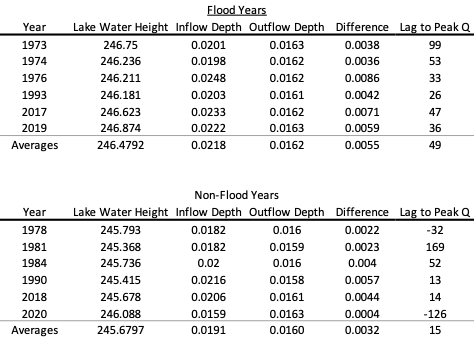

**Table 2.** A table showing all calculated information from the two AnalyzeStorm functions. Flood years are the top portion, while non-flood-years are the bottom portions. All measurements are in units of feet, except for the units of days for the lag-to-peak discharge.

Table 2 shows the average lake water height for the year, average inflow depth for the eyar, average outflow depth for the year, the difference between the two, and the lag-to-peak discharge for the year for flood- and non-flood-years. 2019 was shown to have the highest average yearly lake water height, and a maximum discharge of 0.0163 feet per day. This maximum discharge is not significantly higher than the maximum discharge of most years, showing the likely inability to allow more water out of the lake. But, as shown by Figure 2, 2019 had a drop in total outflow just as the lake height was rising. This likely further exacerbated the flooding experienced along the coast. 

The differences between flood- and non-flood-year parameters were generally not significant, with average flood-year lake level heights being roughly one-foot higher than non-flood-years. The average daily total inflow depths for each year were also not significantly different between flood- and non-flood years. This could be due to the analysis bias of average precipitation across the year added into the total inflow from the three rivers. Where the difference arises is from the lag-to-peak discharge between flood- and non-flood-years. The flood-years had an average lag-to-peak discharge of 49 days, while the non-flood-years had an average lag-to-peak dischagre of 15 days. The lower result of the non-flood-years is likely due to having some eyars where peak discharge occurred before the maximum lake level. The times where it occurred before maximum lake level could have been due to a variety of reasons, and preemptive mitigation intent cannot be determined from this analysis. Another issue found with the concept of abnormally wet years being the driver of the lake flooding was that occasionally non-flood-years had higher total daily inflow depths than flood-years. This shows that not all abnormally wet years lead to flood-years.

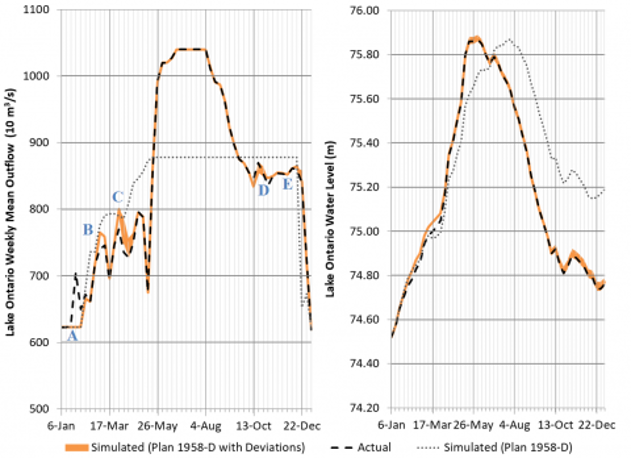

**Figure 4.** This figure is a simulation released by the International Joint Commission for flood-year 2019 and the various potential responses.

Figure 4 is a graphic released by the IJC in response to the criticism after the floods of 2019. It is a computed simulation graph of what would have happened under the three plans (Plan 1958D, 1958DD, and 2014 - actual). The graph shows that what outflows were actually discharged were quite similar to those of Plan 1958DD, with the latter having slightly higher discharges around early-March to mid-April. The most interesting point within the simulation graphic is shown by Plan 1958D having significantly higher initial discharges but reaching a maximum outflow in May. The resultant lake level height in the graphic shows that Plan 1958D woudl ahve shifted the maximum lake level height later into the summer and prolonged the dramatic rise in height. This is significant due to a slower increase in lake level height, and a later timing in the year, could have allowed to flooding damages to be minimized by allowing coastal communities to prepare for the flood levels.

# Conclusions

By analyzing lake height data from the Tides and Currents database, USGS discharge data for 3 major rivers, and NOAA precipitation data from cities along the coast, this study aimed to determine if the recent coastal flooding in Lake Ontario was due to a change in management plan or due to abnormally wet years. This was done by developing a rudimentary water budget for the lake, and calculating various parameters for comparison between flood-years before and after the change in management plan, as well as between flood- and non-flood-years.

In regard to determining if the management plan was the cause of the coastal flooding, this study was not able to make that determination with the analyses completed. Future research should investigate total discharge change increments up to and after the peak lake level to truly analyze what the effects of the management plans have been. Better estimates of water withdrawal and free-water evaporation would also have strengthened this analysis.

For determining if flood-years were abnormally wet, the data did support this assumption. On average, the flood-years had 12% higher inflows than non-flood-years. But this did not always translate into actual causation, as some non-flood-years had higher total inflows than flood-years did. More research would be needed to determine what is truly causing the flooding during abnormally wet and normal precipitation years. 

# Citations

Witherspoon, D. F. (1978). Hydrology of Lake Ontario. SIL Proceedings, 1922-2010, 20(1), 276–279. doi:10.1080/03680770.1977.11896517  
https://ijc.org/en/loslrb/watershed/plan-comparison-2017-2019 
https://www.ijc.org/en/loslrb
https://ijc.org/en/loslrb/lake-ontario-and-upper-st-lawrence-river-flood-risk-diminishes-very-high-outflows-continue
J.A. Derecki, Multiple Estimates of Lake Erie Evaporation, Journal of Great Lakes Research, Volume 2, Issue 1, 1976, Pages 124-149, ISSN 0380-1330,
https://doi.org/10.1016/S0380-1330(76)72281-0.
(https://www.sciencedirect.com/science/article/pii/S0380133076722810)
https://www.nytimes.com/2017/06/18/nyregion/officials-point-fingers-as-lake-ontario-spills-into-neighborhoods.html